In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
# Read each CSV file
train_df = pd.read_csv(os.path.join('../Data', "train_data.csv"))
undersampled_train_df = pd.read_csv(os.path.join('../Data', "undersampled_train_data.csv"))
oversampled_train_df = pd.read_csv(os.path.join('../Data', "oversampled_train_data.csv"))
extracted_features_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_train_data.csv"))
extracted_features_undersampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_undersampled_train_data.csv"))
extracted_features_oversampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_oversampled_train_data.csv"))
test_df = pd.read_csv(os.path.join('../Data', "test_data.csv"))

In [3]:
N_SPLITS = 3

# Apply on the original data

In [ ]:
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

# Define SVM hyperparameter grid
svm_params = {
    'C': [0.1, 0.5, 1],
    'kernel': ['linear', 'rbf']
}

# Set up GridSearchCV with SVM
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),  # enable probability for roc_auc
    param_grid=svm_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Get the best model
svm_model = grid_svm.best_estimator_

print("Best Estimator: ", svm_model)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_svm.best_score_)
print(grid_svm.best_estimator_)

In [ ]:
# Best score with best parameters
best_score = grid_svm.best_score_
best_params = grid_svm.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

In [ ]:
svm = SVC(**best_params)
original_best_svm_model = svm.fit(X_train, y_train)
y_train_pred = original_best_svm_model.predict(X_train)

In [ ]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

In [18]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = original_best_svm_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
svm_score = cross_val_score(original_best_svm_model, X_train, y_train, cv=N_SPLITS)
print(f'SVM Cross Validation Score: {svm_score.mean() * 100}%')

### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the origial data

In [ ]:
X_train = extracted_features_train_df.drop('Class', axis=1).values
y_train = extracted_features_train_df['Class'].values

# Define SVM hyperparameter grid
svm_params = {
    'C': [0.1, 0.5, 1],
    'kernel': ['linear', 'rbf']
}

# Set up GridSearchCV with SVM
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),  # enable probability for roc_auc
    param_grid=svm_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Get the best model
svm_model = grid_svm.best_estimator_

print("Best Estimator: ", svm_model)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_svm.best_score_)
print(grid_svm.best_estimator_)

In [ ]:
svm = SVC(**best_params)
original_best_svm_model_v2 = svm.fit(X_train, y_train)
y_train_pred = original_best_svm_model_v2.predict(X_train)

In [ ]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = original_best_svm_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
svm_score = cross_val_score(original_best_svm_model_v2, X_train, y_train, cv=N_SPLITS)
print(f'SVM Cross Validation Score: {svm_score.mean() * 100}%')

# Apply on the under-sampled data

In [6]:
X_train = undersampled_train_df.drop('Class', axis=1).values
y_train = undersampled_train_df['Class'].values

# Define SVM hyperparameter grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Set up GridSearchCV with SVM
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),  # enable probability for roc_auc
    param_grid=svm_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Get the best model
svm_model = grid_svm.best_estimator_

print("Best Estimator: ", svm_model)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Estimator:  SVC(C=10, probability=True)


In [7]:
# results of grid search CV
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.018070,0.002539,0.002638,0.000513,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.970738,0.975364,0.985840,0.977314,0.006318,4,0.991946,0.988114,0.985196,0.988418,0.002764
1,0.032166,0.001593,0.004693,0.003386,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.967789,0.982246,0.990269,0.980101,0.009302,3,0.989203,0.981772,0.979153,0.983376,0.004257
2,0.021082,0.002271,0.000000,0.000000,1.0,linear,"{'C': 1, 'kernel': 'linear'}",0.962931,0.976579,0.982111,0.973873,0.008060,5,0.994340,0.988013,0.985022,0.989125,0.003884
3,0.019435,0.004561,0.008392,0.006945,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.970217,0.986410,0.992075,0.982901,0.009262,2,0.992802,0.987360,0.986150,0.988770,0.002893
4,0.185897,0.070988,0.002811,0.002856,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.956859,0.980453,0.983334,0.973549,0.011860,6,0.994572,0.987635,0.984979,0.989062,0.004044
5,0.017099,0.000250,0.008475,0.000462,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.971895,0.989648,0.989161,0.983568,0.008257,1,0.995400,0.990509,0.989244,0.991717,0.002654


In [8]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_svm.best_score_)
print(grid_svm.best_estimator_)

Best roc_auc:- 0.9835681269309845
SVC(C=10, probability=True)


In [9]:
# Best score with best parameters
best_score = grid_svm.best_score_
best_params = grid_svm.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9835681269309845 with parameters {'C': 10, 'kernel': 'rbf'}


In [14]:
undersampled_best_svm_model = grid_svm.best_estimator_
y_train_pred = undersampled_best_svm_model.predict(X_train)

In [15]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[391   3]
 [ 28 366]]


In [16]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9289340101522843
Percision: 0.991869918699187
F1-Score: 0.9593709043250328
Accuracy: 0.9606598984771574
Specificity: 0.9923857868020305
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       394
           1       0.99      0.93      0.96       394

    accuracy                           0.96       788
   macro avg       0.96      0.96      0.96       788
weighted avg       0.96      0.96      0.96       788



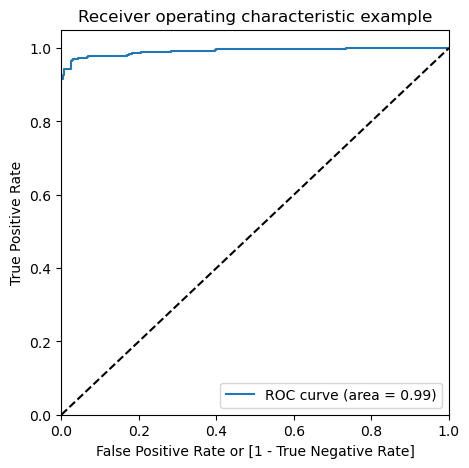

In [19]:
# Predicted probability
y_train_pred_proba = undersampled_best_svm_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [20]:
svm_score = cross_val_score(undersampled_best_svm_model, X_train, y_train, cv=N_SPLITS)
print(f'Logistic Regression Cross Validation Score: {svm_score.mean() * 100}%')

Logistic Regression Cross Validation Score: 94.41703189852842%


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the undersampled data

In [21]:
X_train = extracted_features_undersampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_undersampled_train_df['Class'].values

# Define SVM hyperparameter grid
svm_params = {
    'C': [0.5],
    'kernel': ['linear']
}

# Set up GridSearchCV with SVM
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),  # enable probability for roc_auc
    param_grid=svm_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Get the best model
svm_model = grid_svm.best_estimator_

print("Best Estimator: ", svm_model)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Estimator:  SVC(C=0.5, kernel='linear', probability=True)


In [22]:
# results of grid search CV
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.01259,0.001117,0.001822,0.000252,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.975083,0.977636,0.98688,0.979866,0.005068,1,0.98515,0.984405,0.978048,0.982534,0.003187


In [23]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_svm.best_score_)
print(grid_svm.best_estimator_)

Best roc_auc:- 0.9798662013744314
SVC(C=0.5, kernel='linear', probability=True)


In [27]:
undersampled_best_svm_model_v2 = grid_svm.best_estimator_
y_train_pred = undersampled_best_svm_model_v2.predict(X_train)

In [28]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[379   5]
 [ 38 356]]


In [29]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9035532994923858
Percision: 0.9861495844875346
F1-Score: 0.9430463576158941
Accuracy: 0.9447300771208226
Specificity: 0.9869791666666666
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       384
           1       0.99      0.90      0.94       394

    accuracy                           0.94       778
   macro avg       0.95      0.95      0.94       778
weighted avg       0.95      0.94      0.94       778



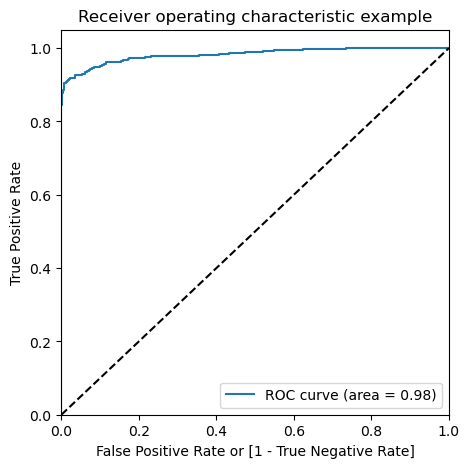

In [31]:
# Predicted probability
y_train_pred_proba = undersampled_best_svm_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [32]:
svm_score = cross_val_score(undersampled_best_svm_model_v2, X_train, y_train, cv=N_SPLITS)
print(f'SVM Cross Validation Score: {svm_score.mean() * 100}%')

SVM Cross Validation Score: 94.73071973071973%


# Apply on the over-sampled data

In [ ]:
X_train = oversampled_train_df.drop('Class', axis=1).values
y_train = oversampled_train_df['Class'].values

# Define SVM hyperparameter grid
svm_params = {
    'C': [0.5],
    'kernel': ['linear']
}

# Set up GridSearchCV with SVM
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),  # enable probability for roc_auc
    param_grid=svm_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Get the best model
svm_model = grid_svm.best_estimator_

print("Best Estimator: ", svm_model)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_svm.best_score_)
print(grid_svm.best_estimator_)

In [ ]:
# Best score with best parameters
best_score = grid_svm.best_score_
best_params = grid_svm.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

In [ ]:
svm = SVC(**best_params)
oversampled_best_svm_model = svm.fit(X_train, y_train)
y_train_pred = oversampled_best_svm_model.predict(X_train)

In [ ]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = oversampled_best_svm_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
svm_score = cross_val_score(oversampled_best_svm_model, X_train, y_train, cv=N_SPLITS)
print(f'SVM Cross Validation Score: {svm_score.mean() * 100}%')

### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the oversampled data

In [ ]:
X_train = extracted_features_oversampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_oversampled_train_df['Class'].values

# Define SVM hyperparameter grid
svm_params = {
    'C': [0.5],
    'kernel': ['linear']
}

# Set up GridSearchCV with SVM
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),  # enable probability for roc_auc
    param_grid=svm_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_svm.fit(X_train, y_train)

# Get the best model
svm_model = grid_svm.best_estimator_

print("Best Estimator: ", svm_model)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_svm.best_score_)
print(grid_svm.best_estimator_)

In [ ]:
svm = SVC(**best_params)
oversampled_best_svm_model_v2 = svm.fit(X_train, y_train)
y_train_pred = oversampled_best_svm_model_v2.predict(X_train)

In [ ]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = oversampled_best_svm_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
svm_score = cross_val_score(oversampled_best_svm_model_v2, X_train, y_train, cv=N_SPLITS)
print(f'SVM Cross Validation Score: {svm_score.mean() * 100}%')